<center style="font-size:30px;padding-bottom:10px;color:DarkBlue;">Métodos Avanzados en Estadística</center>
<center> _____________________________________________________________________________________________ </center>
<p>&nbsp;</p>
<center style="font-size:25px;padding-bottom:10px;color:CornFlowerBlue;">Tema 2: Estimadores del núcleo de la función de densidad</center>
<center style="font-size:20px;padding-bottom:10px;color:LightCoral;">Ejercicios de la hoja 2</center>
<center style="font-size:14px;">30 de diciembre 2021</center>
<center style="font-size:12px;">Gloria del Valle Cano</center>
<center style="font-size:12px;"><a href="mailto:gloria.valle@estudiante.uam.es">gloria.valle@estudiante.uam.es</a></center>

# Ejercicio 1
**Enunciado.** Sea $X^*$ una v.a. cuya función de densidad es un estimador del núcleo con parámetro de suavizado $h$ y núcleo gaussiano. Calcula la esperanza y varianza de $X^*$.

**Solución.** Dada una muestra fija de vaiid $X_1...X_n$, queremos estimar su densidad $f$. El estimador sigue la siguiente fórmula:

$$
\hat f(x) = \frac{1}{nh} \sum_{i=1}^{n} \mathcal{K} \Big(\frac{x-X_i}{h}\Big),
$$

la cual es la estimación de la densidad de $X^*$.

**Esperanza**

Se tiene que:

$$
\mathbb E[X^\ast]=\int_{\mathbb R} x \frac{1}{nh}\sum_{i=1}^n K(h^{-1}(x-X_i))\, dx =\frac{1}{nh}\sum_{i=1}^n \int_{\mathbb R} xK(h^{-1}(x-X_i))\, dx.
$$

Consideramos ahora el cambio de variable $z= h^{-1}(x- X_i)$, que aplicado a la igualdad anterior nos permite escribir:

$$
\mathbb E[X^\ast] = \frac{1}{nh}\sum_{i=1}^n \int_{\mathbb R} (hz + X_i) K(z)|h|\, dz= \frac{1}{n} \sum_{i=1}^n \Bigg( h\overbrace{\int_{\mathbb R} zK(z)\, dz}^{E[\mathcal{N} (0, 1)] = 0} + X_i \overbrace{\int_{\mathbb R} K(z)\, dz}^{1} \Bigg)=\frac{1}{n} \sum_{i=1}^n X_i = \bar{X}.
$$

Por tanto, la esperanza de $X^\ast$ es la media muestral de la muestra original. Otra forma de llegar a esta conclusión es utilizar que $X^\ast=Y+Z$, donde $Y$ se distribuye según $F_n$, $Z$ tiene densidad $h^{-1}K(x/h)$, y $Z$ e $Y$ son independientes. En este caso, se tiene:

$$\mathbb E[X^\ast] = \mathbb E[Y] + \mathbb E[Z] = \bar{X} + h^{-1}\int_{\mathbb R} xK(x/h)\, dx =\bar{X} + h\int_{\mathbb R} zK(z)\, dz = \bar{X}.$$

**Varianza**

El cálculo de la varianza es análogo a lo que hemos hecho antes, volviendo a utilizar el cambio de variable $z= h^{-1}(x- X_i)$ cuando sea oportuno:

$$Var[X^\ast] = \mathbb E[(X^\ast- \bar{X})^2] = \frac{1}{nh}\sum_{i=1}^n \int_{\mathbb R}(x-\bar{X})^2K(h^{-1}(x-X_i))\, dx = \frac{1}{n}\sum_{i=1}^n \int_{\mathbb R} (hz +X_i-\bar{X})^2 K(z)\, dz =$$
$$=\frac{1}{n} \sum_{i=1}^n \left( h^2\int_{\mathbb R} z^2 K(z)\, dz + 2h(X_i - \bar{X})\int_{\mathbb R} zK(z)\, dz + (X_i - \bar X)^2\int_{\mathbb R} K(z)\, dz \right)=$$
$$=\frac{1}{n} \sum_{i=1}^n \left( h^2 \left(Var[\mathcal N(0, 1)] + \mathbb E[N(0, 1)]^2\right) + (X_i - \bar{X})^2 \right) = h^2 + \frac{1}{n} \sum_{i=1}^n (X_i - \bar{X})^2 = h^2 + s^2.$$

Es decir, la varianza de $X^\ast$ se descompone como suma del cuadrado del parámetro de suavizado y de la varianza muestral (sesgada) de la muestra original.


# Ejercicio 2
**Solución.** Realiza un análisis descriptivo de los datos británicos de ingresos familiares en 1975 (reescalados dividiendo por la media) contenidos en el fichero [Datos-ingresos.txt](http://matematicas.uam.es/~joser.berrendero/datos/Datos-ingresos.txt). En concreto, calcula su media, mediana y desviación típica, y un estimador del núcleo de la función de densidad. Comenta los resultados.

In [1]:
df <- read.table("http://matematicas.uam.es/~joser.berrendero/datos/Datos-ingresos.txt", col.name="ingresos", header=F)
head(df)

,ingresos
,<dbl>
1,0.0120
2,0.1644
3,0.1802
4,0.1921
5,0.1984
6,0.2045


In [2]:
cat("Mean: ", mean(df$ingresos))

cat("\nMedian: ", median(df$ingresos))

cat("\nStandard Deviation: ", sd(df$ingresos))

Mean:  1.022779
Median:  0.9417
Standard Deviation:  0.6048126

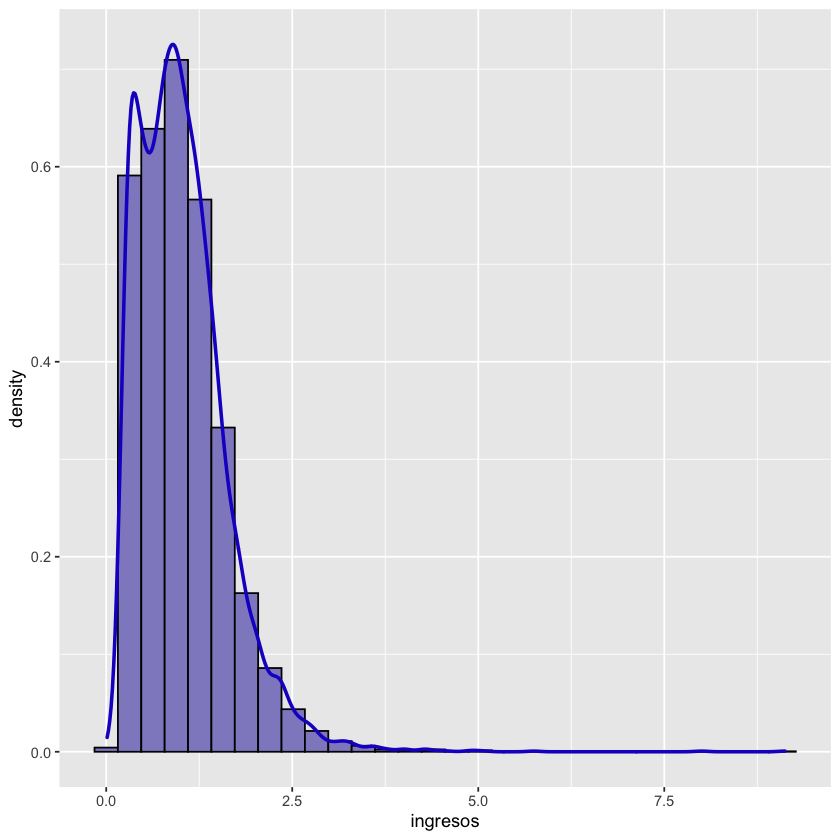

In [4]:
library(ggplot2)
library(gridExtra)

p1 <- ggplot(df, aes(x=ingresos)) +
        geom_histogram(aes(y=..density..), bins=30, colour="black", fill="#918CC9") +
        geom_density(color = '#1F10CC', lwd=1)
p1

Se trata de una distribución asimétrica a la derecha, donde la cola desciende rápidamente a 0. La estimación del núcleo es bastante aproximada, además de que el balance entre sesgo y varianza es bastante bueno.

# Ejercicio 3

**Enunciado.** Los datos del fichero [lipidos.txt](http://verso.mat.uam.es/~joser.berrendero/datos/lipidos.txt) corresponden a la concentración de colesterol y triglicéridos (mg/dl) en pacientes evaluados por tener un dolor en el pecho. De estos pacientes, 51 no presentaron evidencia de enfermedad cardiaca mientras que 320 sí la presentaron.

**(a)** Representa un estimador del núcleo de la densidad para la variable correspondiente a la concentración de triglicéridos (utiliza primero todos los datos y después trata por separado a los individuos sanos y enfermos). Experimenta utilizando distintos núcleos y distintos valores del parámetro de suavizado. Comenta el resultado.

**(b)** Representa un estimador del núcleo bidimensional para el vector de variables correspondiente a las concentraciones de triglicéridos y colesterol, tratando por separado los datos de los individuos enfermos y los sanos. Comenta el resultado.

In [5]:
# Esta url no funciona.
df <- read.table("http://verso.mat.uam.es/~joser.berrendero/datos/lipidos.txt", header=T)
head(df)

,X195.00,X348.00
,<dbl>,<dbl>
1,228,119
2,206,99
3,190,108
4,208,139
5,207,160
6,237,174


In [15]:
library(magrittr)
library(dplyr)

load(url("http://verso.mat.uam.es/~joser.berrendero/datos/lipidos.RData"))
lipidos <- lipidos %>% 
  mutate(Enfermo = factor(Enfermo)) %>% 
  rename(Enfermedad = Enfermo)

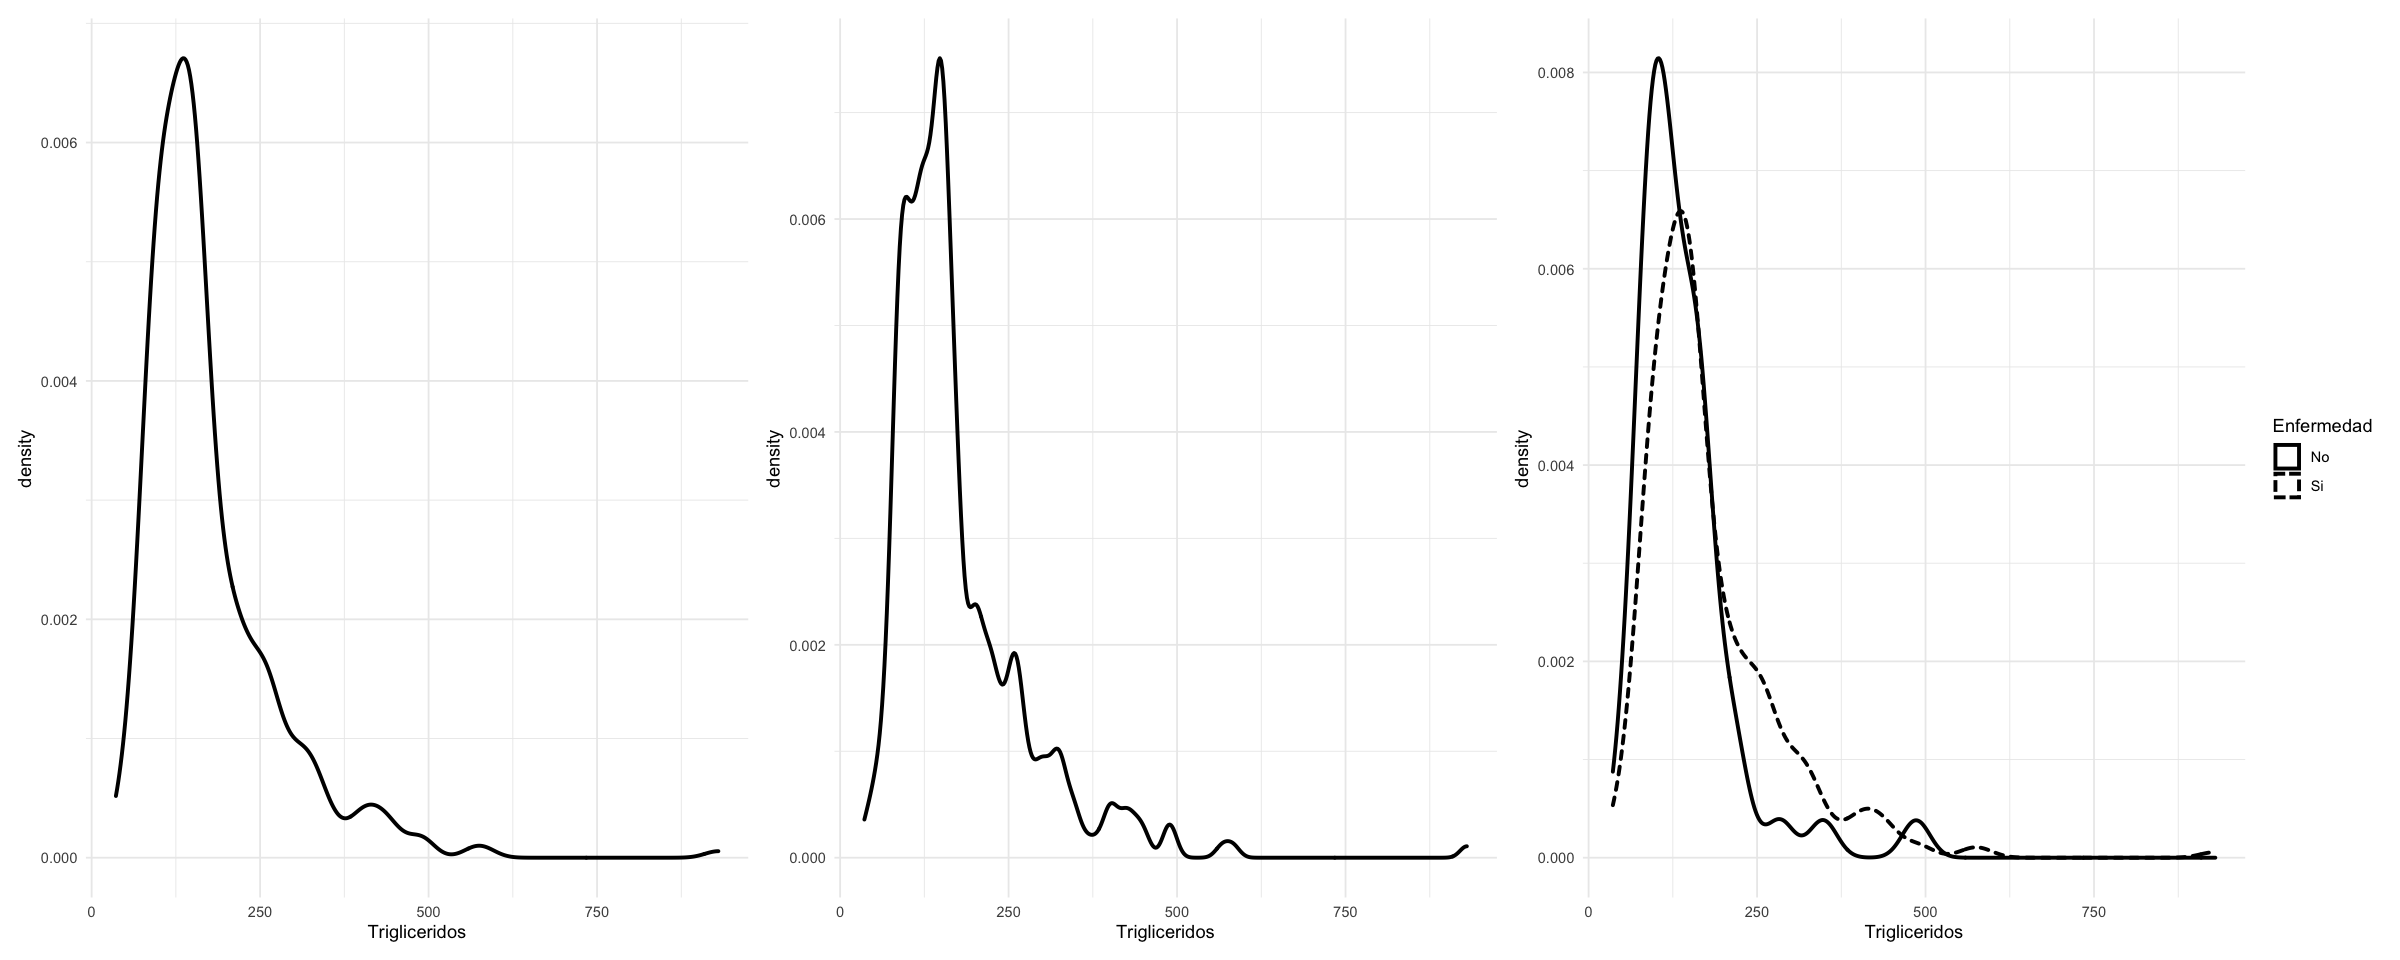

In [22]:
library(patchwork)

p1 <- ggplot(lipidos) +
        geom_density(aes(x = Trigliceridos), # por defecto bw.nrd0
                    size = 1.1) +
        theme_minimal()

p2 <- ggplot(lipidos) +
        geom_density(aes(x = Trigliceridos),
                    size = 1.1, bw = 10) +
        theme_minimal()

p3 <- ggplot(lipidos) +
        geom_density(aes(x = Trigliceridos, linetype = Enfermedad),
                    size = 1.1) +
        theme_minimal()

options(repr.plot.width=20, repr.plot.height=8)
p1+p2+p3



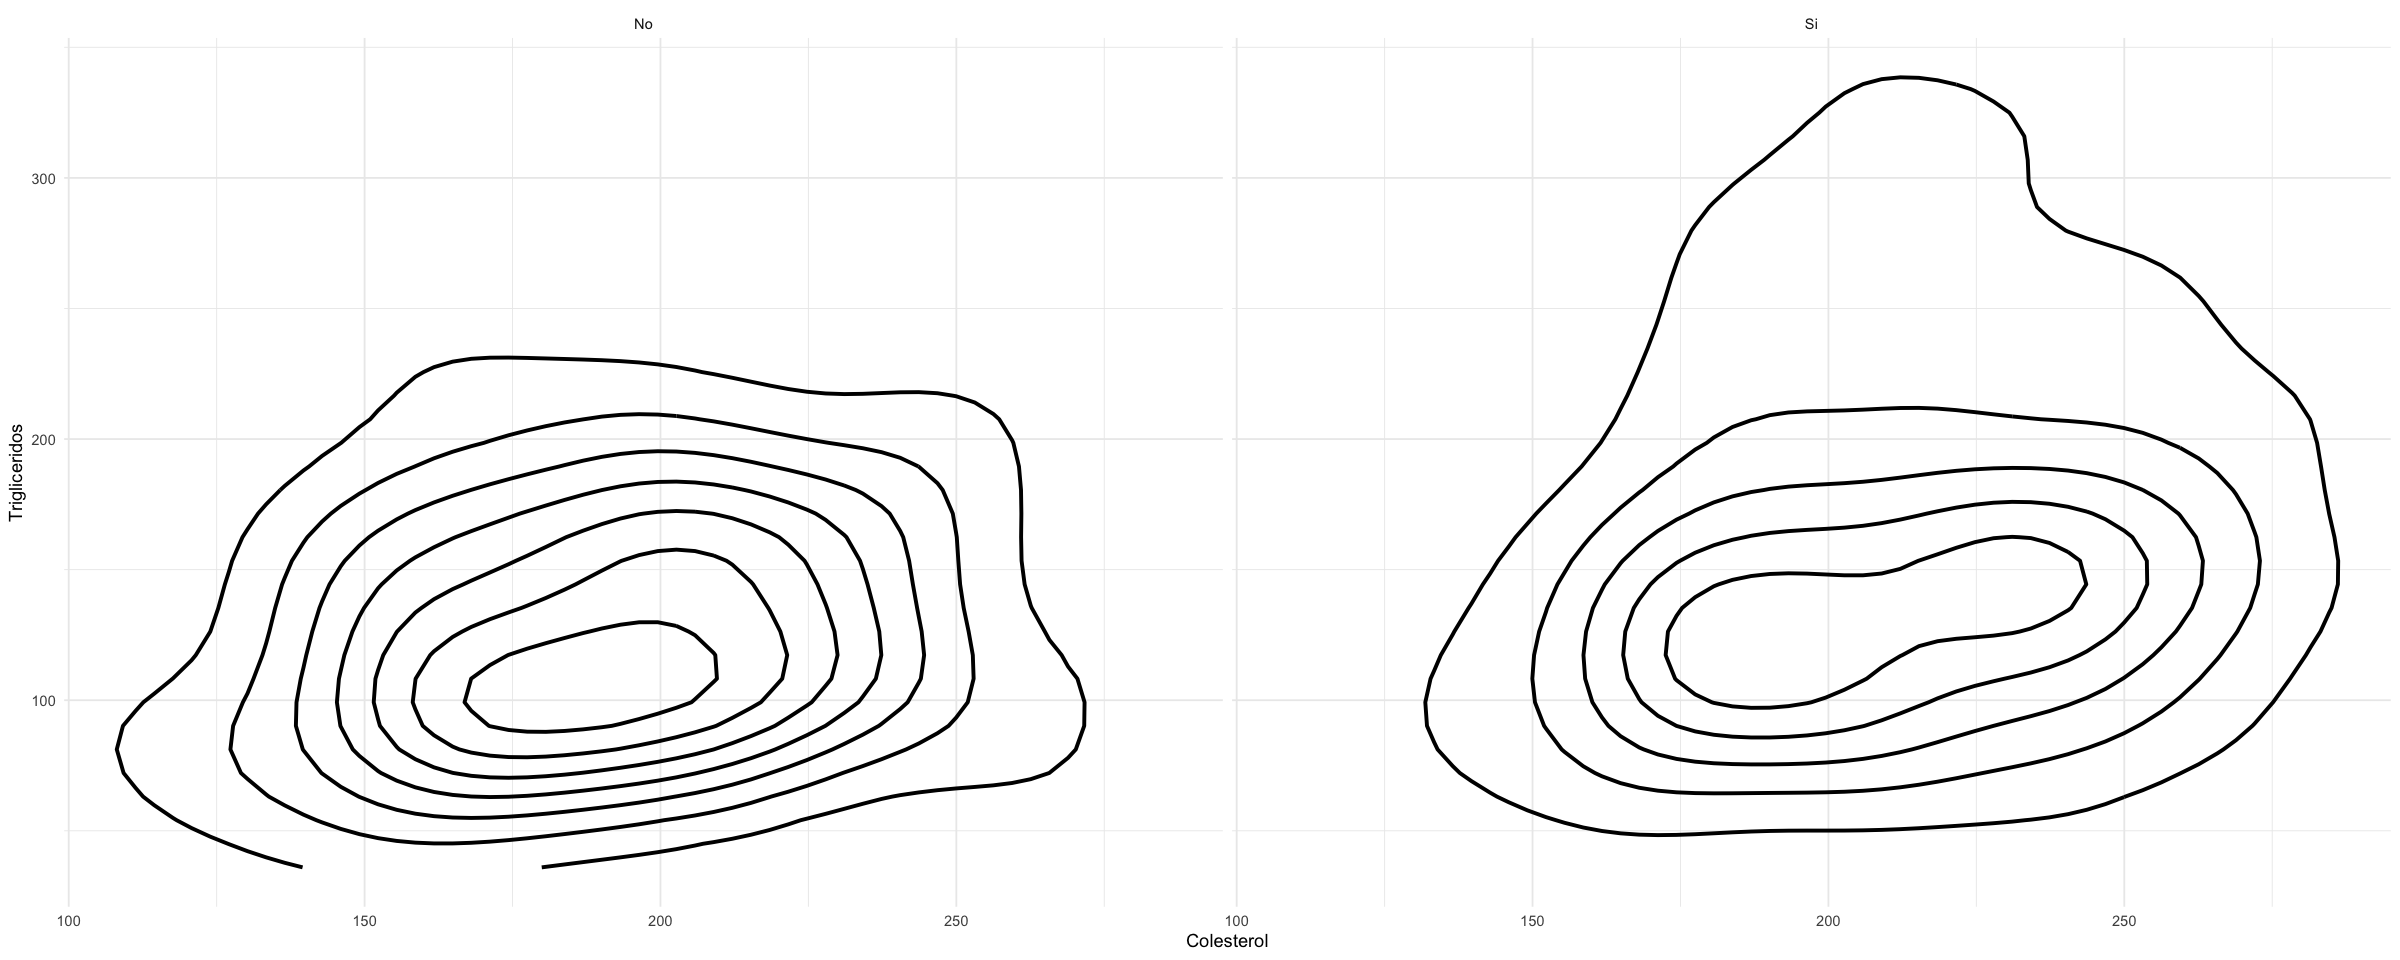

In [23]:
ggplot(lipidos, aes(x=Colesterol, y = Trigliceridos)) +
  # geom_point(alpha = 0.3) +
  geom_density_2d(size = 1.1, col = 'black') +
  facet_wrap( ~ Enfermedad) + 
  theme_minimal()

# Ejercicio 4
Sea $\hat f (x)$ un estimador del núcleo con parámetro de suavizado $h$ y núcleo simétrico $\mathcal{K}$. Demuestra que:

$$
\int \hat f^2dx= \frac{1}{n^2h} \sum_{i=1}^{n} \sum_{j=1}^{n} \mathcal{K} * \mathcal{K} \Big( \frac{x-X_i}{h}\Big),
$$
donde $\mathcal{K}*\mathcal{K}(u) = \int \mathcal{K}(u-y)dy$ es la convolución de $\mathcal{K}$.

Hecho cuaderno (pasar)

# Ejercicio 5
Sea $F_n$ la función de distribución empírica correspondiente a una muestra $X_1...X_n$ y sea $X_1^*...X_n^*$ una remuestra extraída de $F_n$. Se calcula un estimador del núcleo $\hat f^*_h(x) a partir de X_1^*...X_n^*$ y otro $\hat f_h(x)$ a partir de $X_1...X_n$. Demuestra que:

$$
\mathbb E_{F_n}\left[ \hat f_h^\ast(x) - \hat f_h(x) | X_1,...,X_n\right]=0.
$$

¿Qué implica este resultado sobre el uso del bootstrap para estimar el sesgo de los estimadores del núcleo?

 Hecho cuaderno (pasar)

# Ej 6 y 7 Notion